In [1]:
# importing required modules
import pylab as pl
import pandas as pd
import numpy as np
from numpy import ma
%pylab inline
import os
import scipy.stats
import datetime as dt
import urllib2 as url
from zipfile import ZipFile
from StringIO import StringIO

Populating the interactive namespace from numpy and matplotlib


In [2]:
#importing CSV citibike data for January 2015
r = url.urlopen("https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip").read()
file= ZipFile(StringIO(r))
citibikedata = file.open("201501-citibike-tripdata.csv")
data = pd.read_csv(citibikedata)
print data.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [3]:
#creating additional columns on the dataframe (data) - female and male ages (subscribers)
data['ageM'] = 2015-data['birth year'][(data['usertype'] == 'Subscriber') & (data['gender'] == 1)]
data['ageF'] = 2015-data['birth year'][(data['usertype'] == 'Subscriber') & (data['gender'] == 2)]

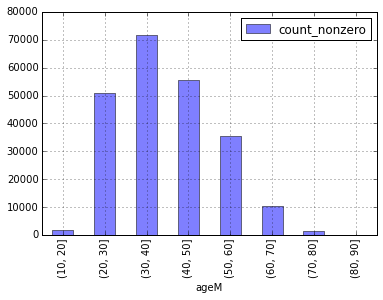

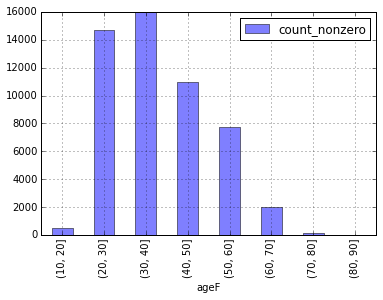

In [4]:
#Grouping bins for each of the new columns and plitting them by 10yr range bins
bins = np.arange(10, 99, 10)
data.ageM.groupby(pd.cut(data.ageM, bins)).agg([count_nonzero]).plot(kind='bar', grid=True, alpha=0.5)
data.ageF.groupby(pd.cut(data.ageF, bins)).agg([count_nonzero]).plot(kind='bar', grid=True, alpha=0.5)

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


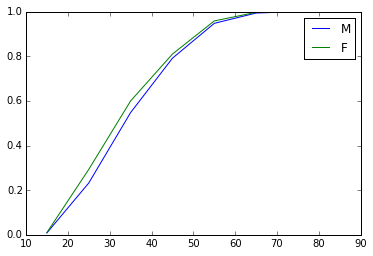

In [5]:
#print the new columns (age of males and women) Cumulative distribution 

csM=data.ageM.groupby(pd.cut(data.ageM, bins)).agg([count_nonzero]).cumsum()

csF=data.ageF.groupby(pd.cut(data.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

#Plotting the new columns (age of males and women) Cumulative distribution 
pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [6]:
#Calculating the KS test for the two samples:
ks = scipy.stats.ks_2samp(data.ageM, data.ageF)
print(ks)

(0.61519793242561782, 0.0)


Due to the lower value of the p-value (0.0) and the KS-Statistic (0.61), we can reject the null hypotesis of the two samples come from the same distribution, and therefore proving that the age variable among men and females subscribers do not behave identically.  

In [7]:
#Calculating the pearson test for the two samples:
ageMnoNA = data.ageM.dropna()
ageFnoNA = data.ageF.dropna()
a=len(ageMnoNA)
b=len(ageFnoNA)
c = a - b
pt = scipy.stats.pearsonr(ageMnoNA[c:], ageFnoNA)
print(pt)

(-0.0018685607874384814, 0.66976655784089156)


The result of the edited pearson test shows a small negative correlation between the two samples; the high p-value of the test however indicates that we have n reason to belive that this correlation is real, and coukd be a result of randomization.

In [8]:
#Calculating the spearman test for the two samples:
scipy.stats.spearmanr(data.ageM, data.ageF, axis=0)

(-0.43552302983795976, 0.0)

As a result of the spearmen test, we can conclude that the two variables are negative correlated (-0.43); this results differs in magnitude with the result in the pearson test. 

In [9]:
bikeyeartime = data[['birth year' , 'starttime', 'usertype']]

In [10]:
datetime_split= [str.split(i)[1] for i in bikeyeartime.starttime]
time_split= [dt.datetime.strptime(i,"%H:%M").hour for i in datetime_split]

In [11]:
hour = pd.DataFrame(time_split, columns=["Hour"])
bikeyeartime2 = pd.merge(bikeyeartime, hour, left_index=True, right_index=True)

In [12]:
#creating additional columns on the dataframe (data) - female and male ages (subscribers)
bikeyeartime2['ageD'] = 2015-bikeyeartime2['birth year'][(bikeyeartime2['usertype'] == 'Subscriber') & (bikeyeartime2['Hour'] <= 12)]
bikeyeartime2['ageN'] = 2015-bikeyeartime2['birth year'][(bikeyeartime2['usertype'] == 'Subscriber') & (bikeyeartime2['Hour'] > 12)]


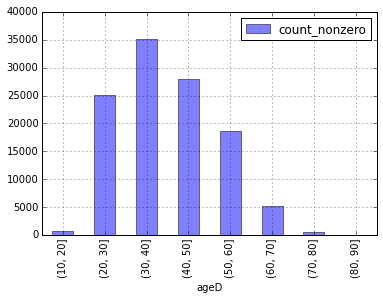

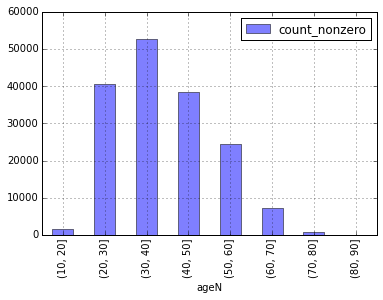

In [13]:
#Grouping bins for each of the new columns and plitting them by 10yr range bins
bins = np.arange(10, 99, 10)
bikeyeartime2.ageD.groupby(pd.cut(bikeyeartime2.ageD, bins)).agg([count_nonzero]).plot(kind='bar', grid=True, alpha=0.5)
bikeyeartime2.ageN.groupby(pd.cut(bikeyeartime2.ageN, bins)).agg([count_nonzero]).plot(kind='bar', grid=True, alpha=0.5)

          count_nonzero
ageD                   
(10, 20]       0.002891
(20, 30]       0.025338
(30, 40]       0.033504
(40, 50]       0.017609
(50, 60]       0.000808
(60, 70]       0.000015
(70, 80]       0.000023
(80, 90]       0.000000


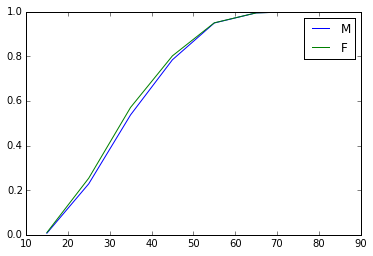

In [14]:
#print the new columns (age of males and women) Cumulative distribution 

csM=bikeyeartime2.ageD.groupby(pd.cut(bikeyeartime2.ageD, bins)).agg([count_nonzero]).cumsum()

csF=bikeyeartime2.ageN.groupby(pd.cut(bikeyeartime2.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

#Plotting the new columns (age of males and women) Cumulative distribution 
pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [15]:
#Calculating the KS test for the two samples:
ks = scipy.stats.ks_2samp(bikeyeartime2.ageD, bikeyeartime2.ageN)
print(ks)

(0.18457583907659547, 0.0)


Due to the lower value of the p-value (0.0) and the KS-Statistic (0.18), we can reject the null hypotesis of the two samples come from the same distribution, and therefore proving that the age variable among day and night riders subscribers do not behave identically.

In [18]:
#Calculating the pearson test for the two samples:
ageDnoNA = bikeyeartime2.ageD.dropna()
ageNnoNA = bikeyeartime2.ageN.dropna()
d=len(ageDnoNA)
e=len(ageNnoNA)
f = e - d
pt = scipy.stats.pearsonr(ageDnoNA, ageNnoNA[f:])
print(pt)

(0.0017104718512214352, 0.56426065058448072)


The result of the edited pearson test shows a small positive correlation between the two samples; the high p-value of the test however indicates that we have n reason to belive that this correlation is real, and coukd be a result of randomization.

In [20]:
#Calculating the spearman test for the two samples:
scipy.stats.spearmanr(bikeyeartime2.ageD, bikeyeartime2.ageN, axis=0)

(-0.69615321724371226, 0.0)

As a result of the spearmen test, due to this result we can conclude that the two variables are negative correlated (-0.69).